# 머신러닝 분류
- 유방암 예측
    - 데이터셋
        - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    - 악성과 양성을 분류
    - 로지스틱회귀
    - 그래프(countplot 등)
    - Tip: 파이썬의 map 함수 사용(y피쳐에 적용), 즉 과1로 바꿔야함.

In [199]:
import kagglehub
# Download latest version
#path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
#print("Path to dataset files:", path)

In [200]:
import pandas as pd
df = pd.read_csv(r'C:\Users\302-1\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [201]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

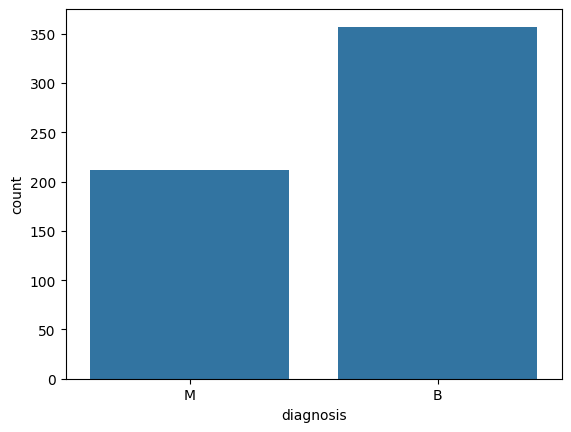

In [202]:
import seaborn as sns
ax = sns.countplot(x = df['diagnosis'])

X에 종양의 지표, y를 악성 여부

In [203]:
X = df.iloc[:,2:32]
y = df['diagnosis'].map({'M':1, 'B':0})
y = pd.DataFrame(y)

print(X.columns.unique())

print(y)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
     diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]


데이터셋 분할

In [204]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 320)

In [210]:
print(train_X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
481        13.90         19.24           88.73      602.9          0.07991   
129        19.79         25.12          130.40     1192.0          0.10150   
91         15.37         22.76          100.20      728.2          0.09200   
207        17.01         20.26          109.70      904.3          0.08772   
40         13.44         21.58           86.18      563.0          0.08162   
..           ...           ...             ...        ...              ...   
261        17.35         23.06          111.00      933.1          0.08662   
35         16.74         21.59          110.10      869.5          0.09610   
401        11.93         10.91           76.14      442.7          0.08872   
366        20.20         26.83          133.70     1234.0          0.09905   
133        15.71         13.93          102.00      761.7          0.09462   

     compactness_mean  concavity_mean  concave points_mean  sym

In [209]:
print(test_X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
364       13.400         16.95           85.48      552.4          0.07937   
206        9.876         17.27           62.92      295.4          0.10890   
398       11.060         14.83           70.31      378.2          0.07741   
135       12.770         22.47           81.72      506.3          0.09055   
1         20.570         17.77          132.90     1326.0          0.08474   
..           ...           ...             ...        ...              ...   
431       12.400         17.68           81.47      467.8          0.10540   
189       12.300         15.90           78.83      463.7          0.08080   
418       12.700         12.17           80.88      495.0          0.08785   
47        13.170         18.66           85.98      534.6          0.11580   
383       12.390         17.48           80.64      462.9          0.10420   

     compactness_mean  concavity_mean  concave points_mean  sym

로지스틱 회귀모델 테스트

In [207]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

pred = model.predict(test_X)

c:\Users\302-1\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\302-1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


모델 정확도

In [211]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, pred)
print(accuracy)

0.9035087719298246
